<a href="https://colab.research.google.com/github/Vish1428/FUTURE_DS_03/blob/main/FUTURE_DS_03_Feedback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:

!pip install textblob
from textblob import TextBlob
!pip install wordcloud
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from IPython.display import display, HTML
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import io, os
from google.colab import files

In [40]:
df = pd.read_csv('/content/college_event_feedback_full.csv')
df.head()

,id,event_name,event_type,department,year_of_study,age,rating,satisfaction_score,feedback,suggestions
0,1,AI Workshop,Cultural,CSE,3rd Year,23,3,79,"Event started late, timing should be improved.",Include more fun activities.
1,2,Tech Fest,Academic,Civil,4th Year,24,2,77,"Event started late, timing should be improved.",Include more fun activities.
2,3,AI Workshop,Sports,IT,3rd Year,22,3,98,"Event started late, timing should be improved.",Add more food stalls.
3,4,Hackathon,Entertainment,ECE,3rd Year,22,5,63,Loved the activities! Had a great time.,Add more food stalls.
4,5,Freshers Party,Academic,ECE,1st Year,19,4,42,Scheduling was smooth; had a really good time.,Make events more interactive.


In [41]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  200 non-null    int64 
 1   event_name          200 non-null    object
 2   event_type          200 non-null    object
 3   department          200 non-null    object
 4   year_of_study       200 non-null    object
 5   age                 200 non-null    int64 
 6   rating              200 non-null    int64 
 7   satisfaction_score  200 non-null    int64 
 8   feedback            200 non-null    object
 9   suggestions         200 non-null    object
dtypes: int64(4), object(6)
memory usage: 15.8+ KB


,0
id,0
event_name,0
event_type,0
department,0
year_of_study,0
age,0
rating,0
satisfaction_score,0
feedback,0
suggestions,0


In [42]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Example cleaning
df['rating'] = df['rating'].astype(float)

# Fill missing values (if any)
df['feedback'] = df['feedback'].fillna("No feedback provided")

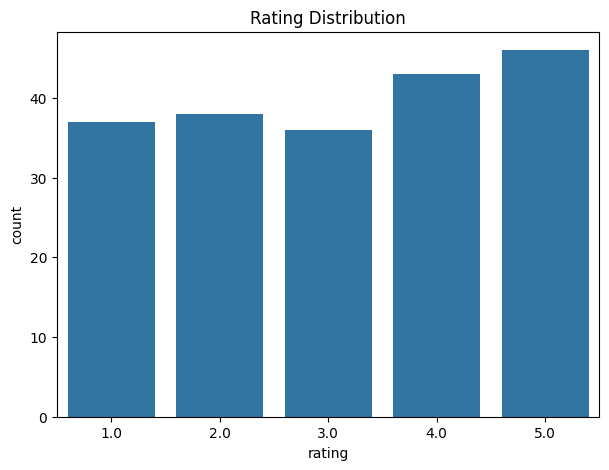

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.countplot(x="rating", data=df)
plt.title("Rating Distribution")
plt.show()

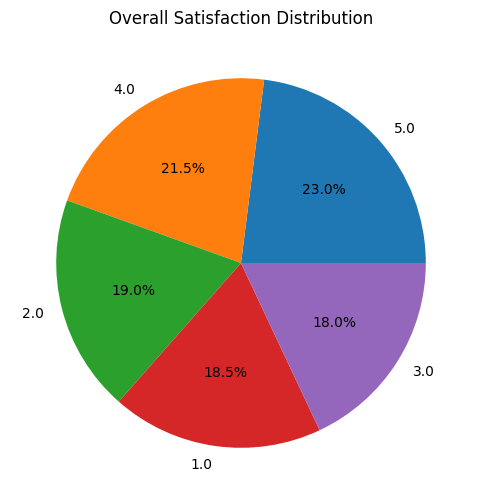

In [44]:
df['rating'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(6,6), ylabel=""
)
plt.title("Overall Satisfaction Distribution")
plt.show()

In [45]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_score'] = df['feedback'].apply(get_sentiment)

# Convert score → Sentiment label
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0
    else 'Negative' if x < 0
    else 'Neutral'
)

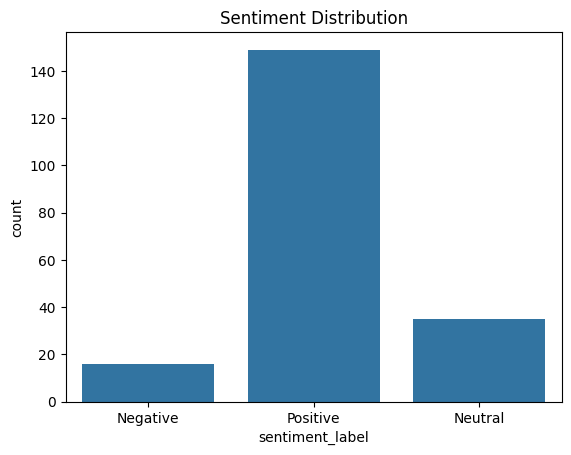

In [46]:
sns.countplot(x='sentiment_label', data=df)
plt.title("Sentiment Distribution")
plt.show()


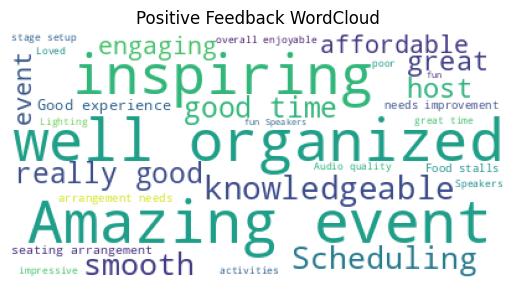

In [47]:
positive_text = " ".join(df[df['sentiment_label']=='Positive']['feedback'])
negative_text = " ".join(df[df['sentiment_label']=='Negative']['feedback'])

wordcloud = WordCloud(background_color='white').generate(positive_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive Feedback WordCloud")
plt.show()

In [48]:

# ===========================
# KPI CARDS
# ===========================
total_students = len(df)
avg_rating = df['rating'].mean()
positive_feedback = sum(df['sentiment_label']=='Positive')
negative_feedback = sum(df['sentiment_label']=='Negative')

kpi_fig = go.Figure()

kpi_fig.add_trace(go.Indicator(
    mode="number",
    value=total_students,
    title={"text": "Total Feedback Responses"},
    domain={'row': 0, 'column': 0}
))

kpi_fig.add_trace(go.Indicator(
    mode="number",
    value=avg_rating,
    title={"text": "Average Rating"},
    domain={'row': 0, 'column': 1}
))

kpi_fig.add_trace(go.Indicator(
    mode="number",
    value=positive_feedback,
    title={"text": "Positive Feedback Count"},
    domain={'row': 0, 'column': 2}
))

kpi_fig.update_layout(
    grid={'rows': 1, 'columns': 3},
    template='plotly_dark',
    height=250
)

kpi_fig.show()


# ===========================
# Rating Distribution
# ===========================
fig_rating = px.histogram(df, x="rating", nbins=5,
                          title="Rating Distribution",
                          color="rating")
fig_rating.show()


# ===========================
# Sentiment Distribution
# ===========================
fig_sentiment = px.bar(df['sentiment_label'].value_counts(),
                       title="Sentiment Distribution",
                       labels={'index': 'Sentiment', 'value': 'Count'},
                       color=df['sentiment_label'].value_counts().index)
fig_sentiment.show()


# ===========================
# Event Type Analysis
# ===========================
fig_event_type = px.bar(df, x="event_type",
                        title="Feedback Count by Event Type",
                        color="event_type")
fig_event_type.show()


# ===========================
# Department Breakdown
# ===========================
fig_dept = px.bar(df, x="department",
                  title="Feedback Count by Department",
                  color="department")
fig_dept.show()


# ===========================
# Satisfaction Score Distribution
# ===========================
fig_satisfaction = px.box(df, y="satisfaction_score",
                          title="Satisfaction Score Distribution")
fig_satisfaction.show()

